
# Tratamiento del Lenguaje 

by Jacky Barraza

From CBC News Coronavirus/COVID-19 Articles (NLP)


**Resources**

https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/

https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da





# <span style="color:#E8846F"> Data <a name="id1"></a>

The dataset is form Kaggle with 3,500 CBC news articles. The link: https://www.kaggle.com/ryanxjhan/cbc-news-coronavirus-articles-march-26

It contains the authors, the title, the publish date, the description about the story, the main story, and the url.

I am going to answers the following question by doing this work:

        How the news has been changing from month to month the development of COVID-19 until March 2020? – How the information was express in the 2020 cases in relation with other years? – Wordcloud

        What are the media's main focuses? – K-mean classification

        Is the description matching with the text? – LSTM Text summarizing

        Texting the text generation on this arcticles applying Neural Networks. 



# <span style="color:#E8846F"> Table of Content <a name="id1"></a>
    
1.	[Loading Dataset](#id3)
    
2.	[Exploring the dataset](#id4)
    
3.	[Cleaning and Pre-Processing](#id5)
    
4.	[Word Cloud - News evolutions](#id6)
    
5.	[How the news has been changing from month to month the development of COVID-19 until March 2020?](#id7)
    
6.	[K-Means classification](#id8)
    
7.	[What are the media's main focuses?](#id9)

8.  [Which Organizations are mentioned in the articles?](#id10)
    
9.	[LSTM Text summarizing](#id11)
    
10.	[Is the description matching with the text?](#id12)

    

  



In [1]:
#pip install unicodedata2

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from datetime import datetime 
from collections import Counter
from PIL import Image
import re

import warnings 
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings('ignore')

import pickle
from tqdm import tqdm
import glob
from bs4 import BeautifulSoup
import unicodedata
import gensim

from scipy import spatial
from sklearn.manifold import TSNE

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
#from keras import initializers
#from keras import backend as K

#from keras import regularizers, constraints, activations
#from keras.layers.core import Dense, Activation, Dropout, Flatten
#from keras.layers.core import Masking
#from keras.layers.wrappers import TimeDistributed
#from keras.engine import InputSpec


#import tensorflow as tf



Using TensorFlow backend.


#  <span style="color:#E8846F"> 1. Loading Dataset <a name="id3"></a>

In [3]:
#Importing from a local file
df_cbs = pd.read_csv('/Users/jackyb/PycharmProjects/NPL_SumUpLongText/data/input/news.csv')

In [4]:
df_cbs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 7 columns):
Unnamed: 0      3566 non-null int64
authors         3566 non-null object
title           3566 non-null object
publish_date    3566 non-null object
description     3566 non-null object
text            3566 non-null object
url             3566 non-null object
dtypes: int64(1), object(6)
memory usage: 195.1+ KB


The first thing to check if the data has duplicated news and drop it.

In [5]:
df_cbs.drop_duplicates(inplace=True)
df_cbs.dropna(axis=0,inplace=True)
df_cbs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 3565
Data columns (total 7 columns):
Unnamed: 0      3566 non-null int64
authors         3566 non-null object
title           3566 non-null object
publish_date    3566 non-null object
description     3566 non-null object
text            3566 non-null object
url             3566 non-null object
dtypes: int64(1), object(6)
memory usage: 222.9+ KB


In [6]:
df_cbs.head(2)

,Unnamed: 0,authors,title,publish_date,description,text,url
0,0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's prescription drug supply,2020-03-27 08:00:00,"Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...","Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...",https://www.cbc.ca/news/health/covid-19-drug-supply-1.5511659
1,1,['Cbc News'],Yukon gov't names 2 possible sources of coronavirus exposure,2020-03-27 01:45:00,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks. In a news release Thursday even...,https://www.cbc.ca/news/canada/north/yukon-coronavirus-exposure-bethany-church-1.5511906


Checking randonly the rows of the data is found no authors and some uname rows. Let's change it.

In [7]:
df_cbs = df_cbs.drop(['Unnamed: 0'], axis=1)

In [8]:
df_cbs.authors.replace("[]" , "Unknown"  ,inplace = True)

# <span style="color:#E8846F">2. Exploring the dataset <a name="id4"></a>

In [9]:
df_cbs.head(2)

,authors,title,publish_date,description,text,url
0,['Cbc News'],Coronavirus a 'wake-up call' for Canada's prescription drug supply,2020-03-27 08:00:00,"Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...","Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...",https://www.cbc.ca/news/health/covid-19-drug-supply-1.5511659
1,['Cbc News'],Yukon gov't names 2 possible sources of coronavirus exposure,2020-03-27 01:45:00,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks. In a news release Thursday even...,https://www.cbc.ca/news/canada/north/yukon-coronavirus-exposure-bethany-church-1.5511906


Text(0, 0.5, 'Authors')

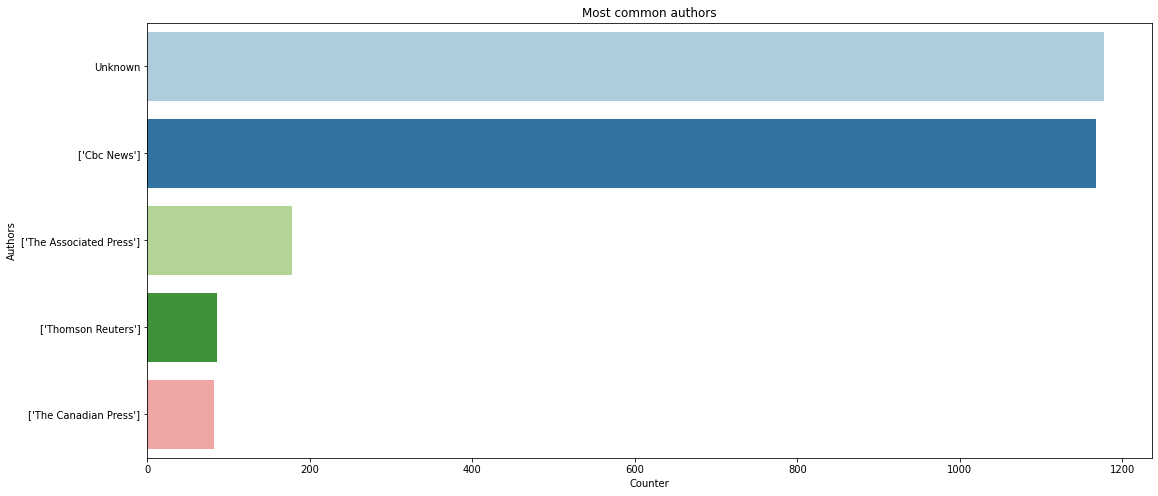

In [104]:
tc = Counter(df_cbs['authors'].tolist()).most_common(5)
tc_index = [table[0] for table in tc]
tc_values = [table[1] for table in tc]
fig,ax = plt.subplots(figsize=(18,8))
sns.set_palette("Paired")
sns.barplot(x = tc_values , y = tc_index, ax = ax, orient = 'h')
plt.title('Most common authors')
plt.xlabel('Counter')
plt.ylabel('Authors')

In [11]:
tc_t = Counter(df_cbs['authors'].tolist()).most_common(8)
tc_t

[('Unknown', 1177),
 ("['Cbc News']", 1168),
 ("['The Associated Press']", 178),
 ("['Thomson Reuters']", 86),
 ("['The Canadian Press']", 82),
 ("['Reporter Editor', 'Bobhristova Is A Reporter Editor With Cbc Hamilton. Email', 'Bobby.Hristova Cbc.Ca', 'Follow', 'Bobbyhristova On Twitter']",
  30),
 ("['Business Reporter', 'Sophia Harris Covers Business', 'Consumer News.', 'Contact', 'Sophia.Harris Cbc.Ca', 'More This Author']",
  15),
 ("['Mark Gollom Is A Toronto-Based Reporter With Cbc News. He Covers Canadian', 'U.S. Politics', 'Current Affairs.']",
  14)]

In [12]:
df_txt = df_cbs[['authors','publish_date','title','description','text']]
df_txt.publish_date = pd.to_datetime(df_txt.publish_date)
df_txt['pub_date'] = df_txt.publish_date.dt.date
df_txt['pub_year'] = df_txt.publish_date.dt.year
#df_txt.drop(['publish_date'], axis=1, inplace = True)
df_txt.head(2)

,authors,publish_date,title,description,text,pub_date,pub_year
0,['Cbc News'],2020-03-27 08:00:00,Coronavirus a 'wake-up call' for Canada's prescription drug supply,"Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...","Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...",2020-03-27,2020
1,['Cbc News'],2020-03-27 01:45:00,Yukon gov't names 2 possible sources of coronavirus exposure,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.,The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks. In a news release Thursday even...,2020-03-27,2020


In [13]:
df_txt.description[:2]

0    Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply c...
1                                       The Yukon government has identified two places in Whitehorse — a church and a dental clinic — where people may have been exposed to the coronavirus in recent weeks.
Name: description, dtype: object

In [14]:
df_txt['pub_year'].value_counts()

2020    3534
2013      16
2014       6
2012       5
2004       2
2019       1
2015       1
2006       1
Name: pub_year, dtype: int64

[Go to Contents.](#id3)

# <span style="color:#E8846F">3. Cleaning and Pre-Processing  <a name="id5"></a> 

### Text to lower case

In [15]:
# from https://gist.github.com/nealrs/96342d8231b75cf4bb82

contraction_mapping = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [16]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [202]:
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

more_stopwords = ['said', 'says','de','al','la','news', 'year', 'per', 'will','monday',\
                      'tuesday','wednesday','thursday','friday','saturday','sunday', 'new', 'dr','unknown'\
                 'first', 'one', 'two', 'three', 'fourth', 'five']
print("Total extra stopwords : ",len([STOPWORDS.add(word) for word in more_stopwords]))
stopwords = set(STOPWORDS)

#stopwords = stopwords.union(more_stopwords)

Total extra stopwords :  24


In [203]:
#stopwords

Defining the functions to clean the news data

In [204]:

#http://www.compjour.org/warmups/govt-text-releases/intro-to-bs4-lxml-parsing-wh-press-briefings/

#https://docs.python.org/2/library/re.html

#Applying re.sub function Return the string obtained by replacing 
#the leftmost non-overlapping occurrences of pattern in 
#string by the replacement repl. If the pattern isn’t 
#found, string is returned unchanged.

def text_sweeped(text,num,):
    
    #removing accented characters
    ntxt = unicodedata.normalize('NFKD', text).encode\
    ('ascii', 'ignore').decode('utf-8', 'ignore')
    
    
    #converting to lowercase
    ntxt = text.lower()
    
    
    #removing contractions
    ntxt = ' '.join([contraction_mapping[t] if t in contraction_mapping\
                        else t for t in ntxt.split(" ")])   
    
    #removing spaecial character
    ntxt = re.sub(r'\([^)]*\)', '', ntxt)
    ntxt = re.sub('"','', ntxt)
    ntxt = re.sub(r"'s\b","",ntxt)
    ntxt = re.sub("[^a-zA-Z]", " ", ntxt)
    
    #removing stopwords
    if(num==0):
        tokens = [w for w in ntxt.split() if not w in stopwords]
    else:
        tokens=ntxt.split()
    long_words=[]
    
    #removing short words
    for i in tokens:
        if len(i)>1:    
            long_words.append(i)   
    return (" ".join(long_words)).strip()


In [205]:
cl_text = []
for t in df_txt['text']:
    cl_text.append(text_sweeped(t,0)) 

In [206]:
cl_text[:2]  

['canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulatory colleges complying canadian pharmacists association call limit amount medications given patients day supplies goal stop people refilling prescriptions early ensure life saving drugs run short supply chains vulnerable mina tadrous pharmacist researcher toronto monitors pharmaceutical supplies worried canadians start stockpiling drugs watching unfolding regions virus spreads pharmacists concerned drugs life saving inhalers people might stockpile based misinformation circulating potential treatments covid relationship people reacting rather actual supply medications tadrous pharmacies medications supplies wholesalers distributors source manufacturers outside wholesalers supply chain outside canada ongoing shortages jacalyn duffin queen university kingston ont long warned increasing frequency 

In [207]:
#call the function
cl_title = []
for t in df_txt['title']:
    cl_title.append(text_sweeped(t,0))

In [208]:
cl_title[:10]

['coronavirus wake call canada prescription drug supply',
 'yukon gov names possible sources coronavirus exposure',
 'senate passes coronavirus relief package',
 'coronavirus latest drug treatment vaccine development',
 'latest coronavirus outbreak march',
 'worse pandemic horizon unless world deals wildlife markets',
 'need know covid ottawa march',
 'michigan hospitals jammed coronavirus cases deaths rise',
 'coronavirus cases now highest world',
 'avoid emergency pleads jewish general hurries find safer ways evaluate mildly ill patients']

In [209]:
#call the function
cl_authors = []
for t in df_txt['authors']:
    cl_authors.append(text_sweeped(t,0))

In [210]:
cl_authors[:10]

['cbc',
 'cbc',
 'associated press',
 'cbc',
 'cbc',
 'mark gollom toronto based reporter cbc covers canadian politics current affairs',
 'cbc',
 'associated press',
 'thomson reuters',
 'leah hendry tv radio online journalist cbc montreal investigates contact via confidential tipline email montrealinvestigates cbc ca follow leah twitter']

In [211]:
#call the function
cl_description = []
for t in df_txt['description']:
    cl_description.append(text_sweeped(t,0))

In [212]:
cl_description[:10]

['canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid',
 'yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks',
 'senate passed unparalleled trillion economic rescue package steering aid businesses workers health care systems engulfed coronavirus pandemic',
 'scientists around world racing find novel ways treat mitigate prevent infection novel coronavirus latest developments',
 'latest coronavirus outbreak cbc march',
 'continued existence wildlife markets considered potential breeding grounds spread harmful viruses means matter time world hit another deadly pandemic scientists suggest',
 'cbc ottawa latest roundup key points coronavirus pandemic',
 'michigan hospitals bracing surge coronavirus cases infections rise least',
 'number confirmed covid cases rose country overtaking italy china death toll passe

In [213]:
df_ctxt = pd.DataFrame()
df_ctxt['c_auth'] = cl_authors
df_ctxt['pub_date'] = df_txt['pub_date'] 
df_ctxt['pub_year'] = df_txt['pub_year'] 
df_ctxt['c_title'] = cl_title
df_ctxt['c_text'] = cl_text
df_ctxt['c_descr'] = cl_description
df_ctxt['pub_dtime'] = df_txt['publish_date'] 


In [214]:
df_ctxt.head(2)

,c_auth,pub_date,pub_year,c_title,c_text,c_descr,pub_dtime
0,cbc,2020-03-27,2020,coronavirus wake call canada prescription drug supply,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulator...,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid,2020-03-27 08:00:00
1,cbc,2020-03-27,2020,yukon gov names possible sources coronavirus exposure,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks release evening government anybody went either place certain days monitor symptoms ma...,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks,2020-03-27 01:45:00


### There are few news around the 2015 when the SARAS happen. I am going to check this later in the Notebook.

In [215]:
dfctxt_bf20=df_ctxt[df_ctxt['pub_year']<2020]
dfctxt_bf20.head(3)

,c_auth,pub_date,pub_year,c_title,c_text,c_descr,pub_dtime
891,cbc,2019-12-22,2019,scrum repatriating canadians china amid coronavirus outbreak,cbc network scrum panel destination frank discussion analysis week big canadian political stories week ask panellists federal government plan repatriate canadian citizens coronavirus affected regi...,cbc network scrum panel destination frank discussion analysis week big canadian political stories week panellists discuss federal government handling coronavirus outbreak social issues conservativ...,2019-12-22 18:36:00
1016,cbc,2013-07-09,2013,mers coronavirus,mers coronavirus public health emergency world health organization panel international experts april laboratory confirmed cases human infections mers coronavirus reported including deaths cases oc...,world health organization emergency committee experts reviewing outbreak assess pandemic potential need measures travel restrictions,2013-07-09 18:33:00
1038,cbc,2013-05-31,2013,italy st mers case travelled jordan,health officials italy reported country first case mers coronavirus man travelling jordan old man good condition monitored isolation admitted hospital tuscany high fever cough breathing difficulti...,saudi health officials inform world health organization case mers coronavirus italy reports first case,2013-05-31 19:28:00


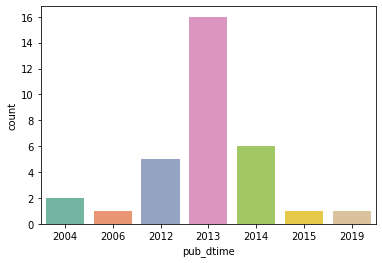

In [216]:
sns.set_palette("Set2")
sns.countplot(dfctxt_bf20['pub_dtime'].dt.year)

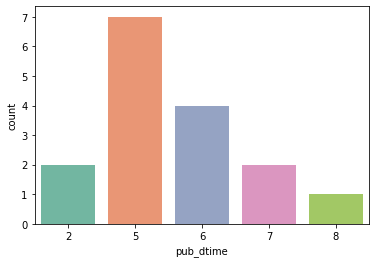

In [217]:
dfctxt_y13=df_ctxt[df_ctxt['pub_year']==2013]
sns.set_palette("Set2")
sns.countplot(dfctxt_y13['pub_dtime'].dt.month)

In [218]:
dfctxt_af20=df_ctxt[df_ctxt['pub_year']==2020]
dfctxt_af20.head(2)

,c_auth,pub_date,pub_year,c_title,c_text,c_descr,pub_dtime
0,cbc,2020-03-27,2020,coronavirus wake call canada prescription drug supply,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulator...,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid,2020-03-27 08:00:00
1,cbc,2020-03-27,2020,yukon gov names possible sources coronavirus exposure,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks release evening government anybody went either place certain days monitor symptoms ma...,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks,2020-03-27 01:45:00


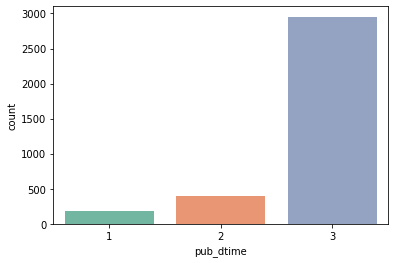

In [219]:
sns.set_palette("Set2")
sns.countplot(dfctxt_af20['pub_dtime'].dt.month)

In [220]:
#df_ctxt
#dfctxt_bf20
#dfctxt_af20

[Go to Contents.](#id3)

# <span style="color:#E8846F">4. Word Cloud - News evolutions <a name="id6"></a>

Let's explore the most frequent words using word clouds.



In [221]:

#Taken from https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(words, month_num, month, mask=None, max_words=200, max_font_size=150, figure_size=(8.0,8.0), 
                   title = None, title_size=30, image_color=False,color = 'white'):

    words_list = dfctxt_af20[dfctxt_af20.pub_dtime.dt.month.astype(int) \
                         == month_num].c_text.values.tolist()

    words = " ".join([ re.sub(r"[^a-zA-Z0-9]+", ' ', word.strip()).strip()\
                   for word in " ".join(words_list).split(" ") ]).split(" ")

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(" ".join(words))
    
    
    plt.figure(figsize=figure_size)
    print(month+" - Total number of words - "+str(len(words)))
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

    
d = '../pec/masks-wordclouds/'

January - Total number of words - 69923


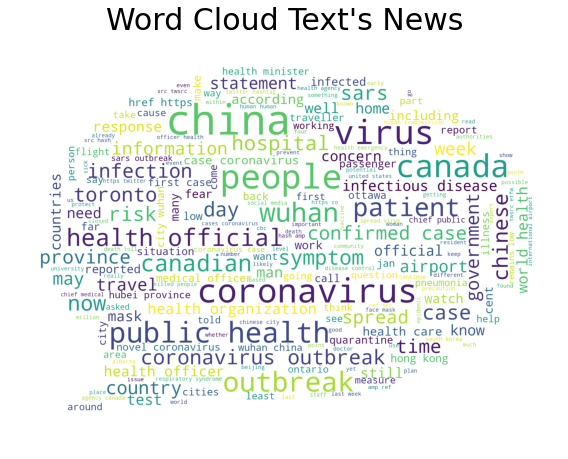

In [222]:

comments_mask1 = np.array(Image.open(d + 'comment.png'))
comments_mask2 = np.array(Image.open(d + 'upvote.png'))
comments_mask3 = np.array(Image.open(d + 'start.png'))
comments_mask4 = np.array(Image.open(d + 'user.png'))

#plot_wordcloud(df_ctxt['c_title'].values, comments_mask, title = "Word Cloud Title's News")
plot_wordcloud(dfctxt_af20['c_text'].values, 1, 'January', comments_mask1, title = "Word Cloud Text's News")


Febrery - Total number of words - 172373


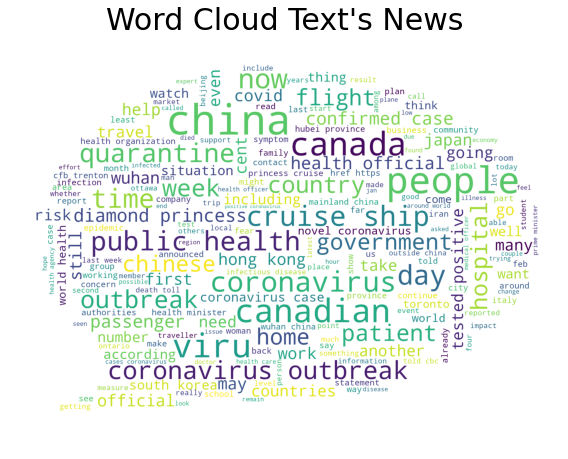

In [223]:
plot_wordcloud(dfctxt_af20['c_text'].values, 2, 'Febrery', comments_mask1, title = "Word Cloud Text's News")


March - Total number of words - 1110417


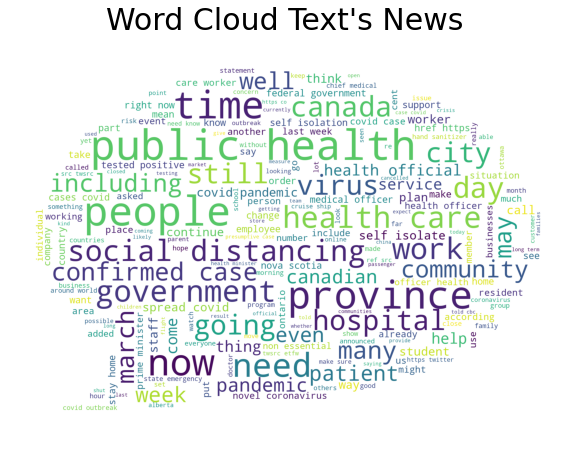

In [224]:
plot_wordcloud(dfctxt_af20['c_text'].values, 3, 'March', comments_mask1, title = "Word Cloud Text's News")


In [225]:


#Taken from https://www.kaggle.com/aashita/word-clouds-of-various-shapes
def plot_wordcloud(words, month_num, month, mask=None, max_words=200, max_font_size=150, figure_size=(8.0,8.0), 
                   title = None, title_size=30, image_color=False,color = 'white'):

    words_list = dfctxt_y13[dfctxt_y13.pub_dtime.dt.month.astype(int) \
                         == month_num].c_text.values.tolist()

    words = " ".join([ re.sub(r"[^a-zA-Z0-9]+", ' ', word.strip()).strip()\
                   for word in " ".join(words_list).split(" ") ]).split(" ")

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(" ".join(words))
    
    
    plt.figure(figsize=figure_size)
    print(month+" - Total number of words - "+str(len(words)))
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 
    
d = '../pec/masks-wordclouds/'


May - Total number of words - 2213


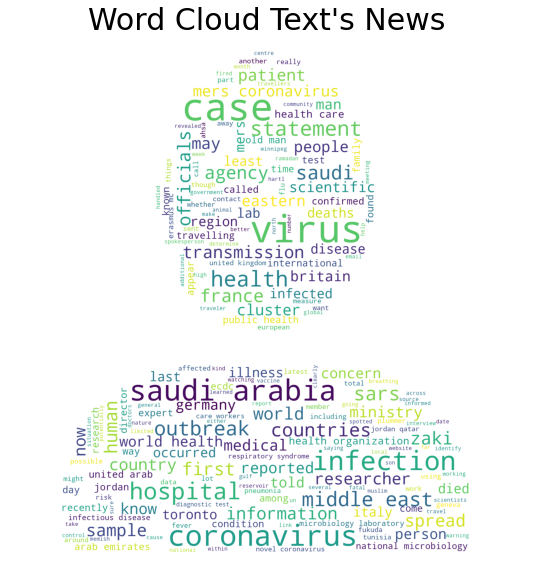

In [226]:
plot_wordcloud(dfctxt_bf20['c_text'].values, 5, 'May', comments_mask4, title = "Word Cloud Text's News")


June - Total number of words - 1718


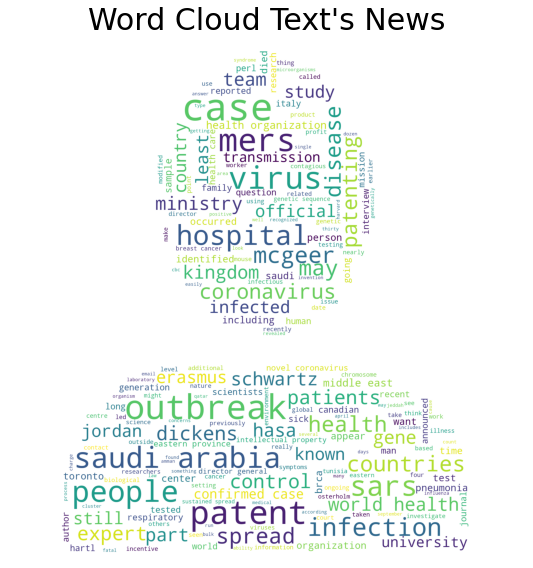

In [227]:
plot_wordcloud(dfctxt_bf20['c_text'].values, 6, 'June', comments_mask4, title = "Word Cloud Text's News")


## <span style="color:#E8846F"> How the news has been changing from month to month the development of COVID-19 until March 2020? <a name="id7"></a>
    
The news shows main works in the importance’s order as:

**January 2020**  
    China, Virus, 
    public health, people, patient, canada, coronavirus
    canidian, coronavirus outbreak, wuhan
    spread, province, case, symptom
    world health, hospital, sars, travel
    
**Febrery 2020**
    China, people, canidian
    Canada, virus, day
    cruise ship, one
    quarantine, public health, flight, outbreak, coronavirus outbreak, chinese
    confirmed case, government, home
    travel, wuhan, official, tested positive
    
**March 2020**
    Public health, people, province, now, time
    Health care, hospital, canada, social distancing, work, care, need
    Pandemic, confirmed, 
    Plan, stay home, covid, self isolation

We can see how the messages was changing firstly focus in China to jump into the words of public health, now, time, health care and hospitals. What I am missing is the words social distancing and self-isolation in not as marked as it has been in Spain and EU, also the world health organization doesn't have a relevant importance on this articles. 

There is data from other years, but this data is marked in 2013. Main works there are:
During the month of May were the main words virus, case, Saudi arabia, infection, coronavirus.
    
During the month if June were case, outbrake, hospital, infection, patent, virus saudi arabia, infection. 

There are few words that we can related with the 2020. The reason can be diverse, and it is not going to be discussed here. 

[Go to Contents.](#id3)

# <span style="color:#E8846F">6. K-Means classification <a name="id8"></a>

In [228]:
#TF IDF for article column
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_txt=tfidf_vectorizer.fit_transform(df_ctxt.c_text)


In [229]:
#tf-idf output vectors
from sklearn.decomposition import PCA 
tfidf_pca = PCA(n_components = 2) #it was tried with 3 PCA but no a good result was delivered
tfidf_pca_comp = tfidf_pca.fit_transform(tfidf_txt.toarray())

In [230]:
tfidf_pca_comp.shape

(3566, 2)

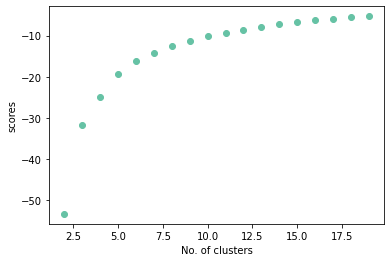

In [231]:
clusters=[]
kmeans_scores=[]
from sklearn.cluster import KMeans
K = range(2, 20)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(tfidf_pca_comp)
    kmeans_scores.append(k_means.score(tfidf_pca_comp))
    clusters.append(k)
plt.scatter(clusters,kmeans_scores)
plt.xlabel("No. of clusters")
plt.ylabel("scores")
plt.show()

In [232]:
tfidf_pca_comp.shape

(3566, 2)

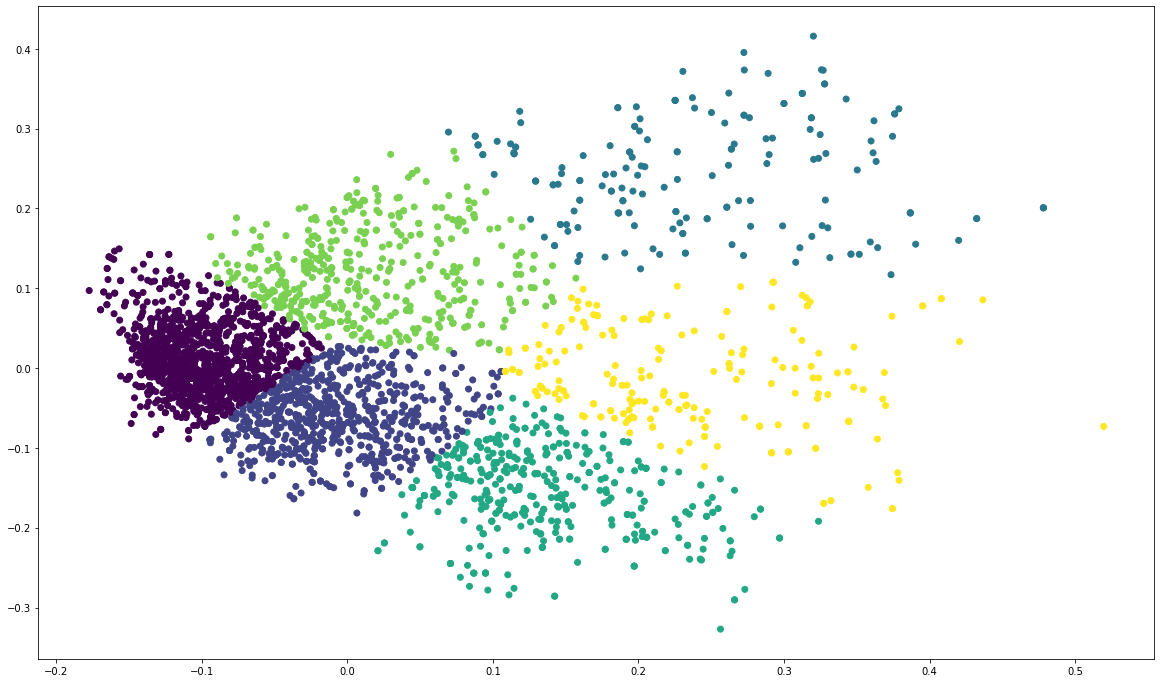

In [233]:
k_means = KMeans(n_clusters=6)
k_means.fit(tfidf_pca_comp)
pred=k_means.predict(tfidf_pca_comp)
plt.figure(figsize=(20,12))
plt.scatter(tfidf_pca_comp[:,0],tfidf_pca_comp[:,1],c=pred)
plt.show()

In [234]:
df_ctxt['tfidf']=tfidf_txt
df_ctxt['tfidf_clusters']=pred
df_ctxt.head(2)

,c_auth,pub_date,pub_year,c_title,c_text,c_descr,pub_dtime,tfidf,tfidf_clusters
0,cbc,2020-03-27,2020,coronavirus wake call canada prescription drug supply,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulator...,canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid,2020-03-27 08:00:00,"(0, 9559)\t0.01994586211998189\n (0, 13218)\t0.012678386564165617\n (0, 23275)\t0.015192613630722206\n (0, 24786)\t0.023528270846773735\n (0, 21429)\t0.023677380197341315\n (0, 21520)\t0.07...",0
1,cbc,2020-03-27,2020,yukon gov names possible sources coronavirus exposure,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks release evening government anybody went either place certain days monitor symptoms ma...,yukon government identified places whitehorse church dental clinic people may exposed coronavirus recent weeks,2020-03-27 01:45:00,"(0, 9559)\t0.01994586211998189\n (0, 13218)\t0.012678386564165617\n (0, 23275)\t0.015192613630722206\n (0, 24786)\t0.023528270846773735\n (0, 21429)\t0.023677380197341315\n (0, 21520)\t0.07...",1


In [235]:
tfidf_txt.shape


(3566, 33301)

In [236]:
top_tf_df = pd.DataFrame(tfidf_txt.todense()).groupby(df_ctxt['tfidf_clusters']).mean()
top_tf_df

,0,1,2,3,4,5,6,7,8,9,...,33291,33292,33293,33294,33295,33296,33297,33298,33299,33300
tfidf_clusters,,,,,,,,,,,,,,,,,,,,,
0,0.000110,0.00000,0.000000,0.000107,0.000128,0.000690,0.000083,0.000052,0.000067,0.000310,...,0.000154,0.000000,0.000000,0.000000,0.000225,0.000352,0.000000,0.000077,0.000000,0.000067
1,0.000460,0.00013,0.000000,0.000000,0.000000,0.000580,0.000000,0.000000,0.000000,0.000133,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000280,0.000078,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000386,0.00000,0.000000,0.000000,0.000000,0.000209,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000230,0.00000,0.000259,0.000000,0.000000,0.000088,0.000000,0.000000,0.000000,0.000110,...,0.000000,0.000149,0.000213,0.000133,0.000000,0.000000,0.000000,0.000000,0.000256,0.000000
5,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## <span style="color:#E8846F">7. What are the media's main focuses? <a name="id9"></a>

In [237]:
for i,r in top_tf_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([tfidf_vectorizer.get_feature_names()[t] for t in np.argsort(r)[-20:]]))


Cluster 0
week,city,workers,school,work,going,help,oil,now,health,budget,canada,coronavirus,home,time,pandemic,students,government,people,covid

Cluster 1
patients,community,symptoms,hospital,march,canada,need,staff,home,government,self,province,cases,emergency,city,care,public,people,health,covid

Cluster 2
officials,confirmed,princess,people,reported,japan,canada,chinese,canadians,quarantine,cruise,outbreak,virus,passengers,health,ship,cases,coronavirus,wuhan,china

Cluster 3
centre,officer,home,ontario,march,emergency,hospital,case,tested,testing,confirmed,public,self,symptoms,people,province,care,cases,covid,health

Cluster 4
world,flights,quarantine,passengers,canadian,government,cases,travel,wuhan,health,ship,canadians,outbreak,people,virus,cruise,chinese,canada,coronavirus,china

Cluster 5
tested,province,iran,man,ontario,symptoms,public,officials,china,woman,canada,covid,people,virus,confirmed,case,henry,coronavirus,cases,health


[Go to Contents.](#id3)

# <span style="color:#E8846F">8. NER - Which Organizations are mentioned in the articles? <a name="id10"></a>


In [238]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy import displacy
from collections import Counter
from pprint import pprint
#nlp = spacy.load('en',disable=['parser', 'tagger','ner'])
#nlp = spacy.load("en_core_web_sm")
nlp.max_length = 15772251 #this number was taken from the error given in the cell defining the tokens

In [239]:
#df_txt.text[1]

In [240]:
from nltk.tokenize import sent_tokenize
sentences = []
for s in df_txt.text:
  sentences.append(sent_tokenize(s))

sentences = [y for x in sentences for y in x] # flatten list

In [241]:
sentences[:3]

['Canadian pharmacies are limiting how much medication can be dispensed to try to prevent shortages, recognizing that most active ingredients for drugs come from India and China and medical supply chains have been disrupted by the spread of COVID-19.',
 'Provincial regulatory colleges are complying with the Canadian Pharmacists Association call to limit the amount of medications given to patients to 30-day\xa0supplies.',
 "The goal is to stop people from refilling prescriptions early and to ensure life-saving drugs don't run short when supply chains are\xa0vulnerable."]

#### Claning sentences

In [242]:
cl_text_sen = []
for t in sentences:
    cl_text_sen.append(text_sweeped(t,0)) 

In [243]:
cl_text_sen[:3]  

['canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid',
 'provincial regulatory colleges complying canadian pharmacists association call limit amount medications given patients day supplies',
 'goal stop people refilling prescriptions early ensure life saving drugs run short supply chains vulnerable']

In [244]:
sentences = cl_text_sen
def separate_punc(doc_text):
   return [token.text for token in nlp(doc_text)]

In [245]:
sentences[4]

'worried canadians start stockpiling drugs watching unfolding regions virus spreads'

In [246]:

sent_str = ""
for i in sentences:
    sent_str += str(i) + "-"
sent_str = sent_str[:-1]



In [247]:
#tokens = separate_punc(sent_str)
#tokens

In [248]:
article = nlp(sent_str)
len(article.ents)


103353

In [259]:
# entities 
#pprint([(X.text, X.label_) for X in doc.ents])

In [258]:
# entities 
#pprint([(X.text, X.label_) for X in doc.ents])

## <span style="color:#E8846F"> Organizations named in the articles <a name="id10"></a>


In [251]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'NORP': 10187,
         'GPE': 27145,
         'PERSON': 19681,
         'LOC': 2220,
         'ORG': 16514,
         'DATE': 13714,
         'TIME': 2750,
         'ORDINAL': 3404,
         'CARDINAL': 4599,
         'FAC': 1565,
         'EVENT': 360,
         'MONEY': 437,
         'PRODUCT': 368,
         'QUANTITY': 164,
         'LANGUAGE': 135,
         'LAW': 38,
         'WORK_OF_ART': 68,
         'PERCENT': 4})

In [252]:
items = [x.text for x in article.ents]
Counter(items).most_common(10)

[('canada', 5283),
 ('china', 3577),
 ('canadians', 2516),
 ('first', 2454),
 ('canadian', 2001),
 ('cbc', 1479),
 ('toronto', 1262),
 ('chinese', 1061),
 ('alberta', 989),
 ('march', 872)]

In [253]:
sent_str = [x for x in article.sents]
print(cl_text_sen[78])

latest developments research


In [257]:
sent_num=[5, 16, 10, 56, 171, 269, 370, 1320]
for s in range(len(sent_num)):
    displacy.render(nlp(str(sentences[s])), jupyter=True, style='ent')

--------
# <span style="color:#E8846F">9. LSTM Text summarizing <a name="id11"></a>

-------

## Abstractive Summarization

---------

The objective is to build a text summarizer where the input is a long sequence of words (df_ctxt = the text sequence), and the output is a short summary (which is a sequence as well). So, the model is build as a Many-to-Many Seq2Seq problem.

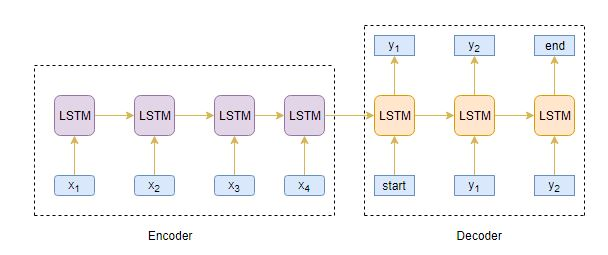

The encoder and decoder are the components for the LSTM and GRU algortihms. Both the parts are practically two different neural network models combined into one giant network. The task of an **encoder** network is to understand the input sequence, and create a smaller dimensional representation of it. This representation is then forwarded to a **decoder** network which generates a sequence of its own that represents the output. 

### Understanding the lengt on the text to get an idea of the seuqnce lenght

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x153327390>,
      dtype=object)

<Figure size 1080x1080 with 0 Axes>

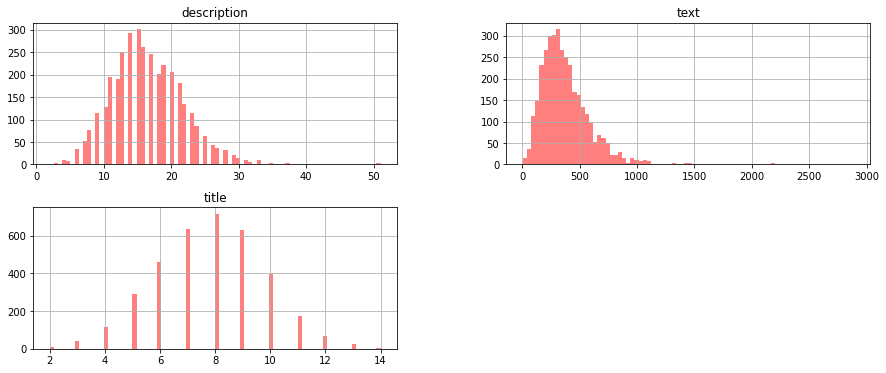

In [53]:

counting_wds_ctxt = []
counting_wds_ctitle = []
counting_wds_cdesc = []


for i in df_ctxt.c_text:
    counting_wds_ctxt.append(len(i.split()))
    
for i in  df_ctxt.c_title:
    counting_wds_ctitle.append(len(i.split()))

for i in  df_ctxt.c_descr:
    counting_wds_cdesc.append(len(i.split()))

length_df = pd.DataFrame({'title':counting_wds_ctitle, 'description':counting_wds_cdesc, 'text':counting_wds_ctxt})
plt.figure(figsize=(15, 15))
length_df.hist(alpha=0.5,color='red', bins=80, label='Text_Length', figsize=(15, 6))
    


In [54]:
#taking the majority texts lenght is close to 400, for title is 10

max_len_text = 220
max_len_title = 10
max_len_descr = 15

In [55]:
#Check how much % of c_text have 0-420 words
cnt=0
for i in df_ctxt.c_text:
    if(len(i.split())<=250):
        cnt=cnt+1
print(cnt/len(df_ctxt.c_text))

0.2936062815479529


In [56]:
#Check how much % of description have 0-100 words
cnt=0
for i in df_ctxt.c_descr:
    if(len(i.split())<=18):
        cnt=cnt+1
print(cnt/len(df_ctxt.c_descr))

0.6640493550196298


In [57]:
#Select the Summaries and Text between max len defined 
#max_len_text = 420 and max_len_descr = 18

cleaned_text =np.array(df_ctxt.c_text)
#cleaned_summary=np.array(df_ctxt.c_title)
cleaned_summary=np.array(df_ctxt.c_descr)

short_text=[]
short_summary_desc=[]
short_summary_title=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_len_descr and len(cleaned_text[i].split())<=max_len_text):
        short_text.append(cleaned_text[i])
        short_summary_desc.append(cleaned_summary[i])
        
post_pre_desc=pd.DataFrame({'text':short_text,'summary_desc':short_summary_desc})


post_pre_desc.head(2)

,text,summary_desc
0,yukon government identified two places whitehorse church dental clinic people may exposed coronavirus recent weeks release evening government anybody went either place certain days monitor symptom...,yukon government identified two places whitehorse church dental clinic people may exposed coronavirus recent weeks
1,michigan hospitals bracing surge coronavirus cases infections rise least deaths jumped eighty five cent cases reported wayne oakland macomb counties even upper peninsula beaumont health henry ford...,michigan hospitals bracing surge coronavirus cases infections rise least


In [58]:
#Select the Summaries and Text between max len defined 
#max_len_text = 420 and max_len_descr = 18

cleaned_text =np.array(df_ctxt.c_text)
#cleaned_summary=np.array(df_ctxt.c_title)
cleaned_summary=np.array(df_ctxt.c_descr)

short_text=[]
short_summary_desc=[]
short_summary_title=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_len_title and len(cleaned_text[i].split())<=max_len_text):
        short_text.append(cleaned_text[i])
        short_summary_title.append(cleaned_summary[i])
        
post_pre_title=pd.DataFrame({'text':short_text,'summary_title':short_summary_title})


post_pre_title.head(2)

,text,summary_title
0,michigan hospitals bracing surge coronavirus cases infections rise least deaths jumped eighty five cent cases reported wayne oakland macomb counties even upper peninsula beaumont health henry ford...,michigan hospitals bracing surge coronavirus cases infections rise least
1,slaight music doubling performing arts fund see performances livestreamed online help artists affected ongoing covid outbreak canadaperforms series announced partnership national arts centre faceb...,donation help pay performances livestreamed artists lose work due pandemic


#### Adding a "START" and "END" to tittle


"START" and "END" are the special tokens which are added to the target sequence before feeding it into the decoder. The target sequence is unknown while decoding the test sequence. So, we start predicting the target sequence by passing the  first word into the decoder which would be always the <start> token. And the <end>
token signals the end of the sentence.

In [59]:
df_ctxt['c_title'] = df_ctxt['c_title'].apply(lambda x : 'srttok '+ x + ' endtkt')

In [120]:
for i in range(2):
    print("Text:",df_ctxt['c_text'][i])
    print("Title:",df_ctxt['c_descr'][i])
    print("\n")

Text: canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulatory colleges complying canadian pharmacists association call limit amount medications given patients day supplies goal stop people refilling prescriptions early ensure life saving drugs run short supply chains vulnerable mina tadrous pharmacist researcher toronto monitors pharmaceutical supplies worried canadians start stockpiling drugs watching unfolding regions virus spreads pharmacists concerned drugs life saving inhalers people might stockpile based misinformation circulating potential treatments covid relationship people reacting rather actual supply medications tadrous pharmacies medications supplies wholesalers distributors source manufacturers outside wholesalers supply chain outside canada ongoing shortages jacalyn duffin queen university kingston ont long warned increasing freque

In [61]:
df_ctxt['c_descr'] = df_ctxt['c_descr'].\
apply(lambda x : 'srttok '+ x + ' endtkt')

In [121]:
for i in range(2):
    print("Text:",df_ctxt['c_text'][i])
    print("Description:",df_ctxt['c_descr'][i])
    print("\n")

Text: canadian pharmacies limiting much medication dispensed try prevent shortages recognizing active ingredients drugs come india china medical supply chains disrupted spread covid provincial regulatory colleges complying canadian pharmacists association call limit amount medications given patients day supplies goal stop people refilling prescriptions early ensure life saving drugs run short supply chains vulnerable mina tadrous pharmacist researcher toronto monitors pharmaceutical supplies worried canadians start stockpiling drugs watching unfolding regions virus spreads pharmacists concerned drugs life saving inhalers people might stockpile based misinformation circulating potential treatments covid relationship people reacting rather actual supply medications tadrous pharmacies medications supplies wholesalers distributors source manufacturers outside wholesalers supply chain outside canada ongoing shortages jacalyn duffin queen university kingston ont long warned increasing freque

#### Defining the validation method as train_test

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_ctxt.c_text,\
                                       df_ctxt.c_descr,\
                                       test_size=0.2,random_state=0,shuffle=True) 

#### Text Tokenizer

In [64]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
              
#preparing tokenizer for text                
Xtr_tokenizer = Tokenizer()
Xtr_tokenizer.fit_on_texts(list(X_train))



#### Rarewords and its Coverage - text

Let's check at the proportion of rare words and its total coverage in the entire text

Defining the threshold to be 4 which means word whose count is below 4 is considered as a rare word

In [65]:
thresh=4

#cnt gives me the no. of rare words whose count falls below threshold
cnt=0

#tot_cnt gives the size of 
#vocabulary (which means every unique words in the text)
tot_cnt=0

freq=0
tot_freq=0

for key,value in Xtr_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 51.76818565949425
Total Coverage of rare words: 2.3318091806581234


In [66]:
#prepare a tokenizer for reviews on training data
#tot_cnt - cnt gives me the top most common words
X_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
X_tokenizer.fit_on_texts(list(X_train))

#convert text sequences into integer sequences
X_train_seq = Xtr_tokenizer.texts_to_sequences(X_train)
X_test_seq = Xtr_tokenizer.texts_to_sequences(X_test)

#padding zero upto maximum length
X_train = pad_sequences(X_train_seq, maxlen=max_len_text, padding='post')
X_test = pad_sequences(X_test_seq, maxlen=max_len_text, padding='post')

#size of vocabulary ( +1 for padding token)
X_voc_size = len(X_tokenizer.word_index) +1

print("Size of vocabulary in X = {}".format(X_voc_size))
                   

Size of vocabulary in X = 30767


#### Description Tokenizer

In [67]:
#preparing a tokenizer for summary on training data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train ))

#### Rarewords and its Coverage - Title

In [68]:
thresh=4

#cnt gives me the no. of rare words whose count falls below threshold
cnt=0

#tot_cnt gives the size of 
#vocabulary (which means every unique words in the text)
tot_cnt=0

freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
            cnt=cnt+1
            freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)
    

% of rare words in vocabulary: 67.00546116504854
Total Coverage of rare words: 13.133251020989647


In [69]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_train))

#convert summary sequences into integer sequences
y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

#padding zero upto maximum length
y_train = pad_sequences(y_train_seq, maxlen = max_len_descr, padding='post')
y_test = pad_sequences(y_test_seq, maxlen = max_len_descr, padding='post')

#size of vocabulary ( +1 for padding token)
y_voc_size = len(y_tokenizer.word_index) + 1

#### Deleting "START" and "END"


In [70]:

########  train  #######
ind=[]
for i in range(len(y_train)):
    cnt=0
    for j in y_train[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_train = np.delete(y_train,ind, axis=0)
X_train = np.delete(X_train,ind, axis=0)


########  test  #######

ind=[]
for i in range(len(y_test)):
    cnt=0
    for j in y_test[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_test = np.delete(y_test,ind, axis=0)
X_test = np.delete(X_test,ind, axis=0)

### Model building

In [71]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LSTM, Embedding, Concatenate, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils import Sequence


In [72]:
#max_len_text = 220
#max_len_title = 10
#max_len_descr = 15

K.clear_session()

latent_dim = 280
embedding_dim = 180

# Encoder
encoder_inputs = Input(shape=(max_len_text,))

# Embeding layer
enc_emb = Embedding(X_voc_size, embedding_dim,\
                    trainable=True)(encoder_inputs)

#Encoder LSTM 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,\
                     return_state=True, dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)


#Encoder LSTM 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,\
                     return_state=True, dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)


#Encoder LSTM 3
encoder_lstm3 = LSTM(latent_dim, return_state=True,\
                   return_sequences=True, dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)


# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc_size, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)


#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state,decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
                                                                                            

#Dense layer
decoder_dense = tf.keras.layers.TimeDistributed(Dense(y_voc_size,activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)
                                                                                           
# Define the model 
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


model.summary()



Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 220)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 220, 180)     5538060     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 220, 280), ( 516320      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [73]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy')

In [74]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1,patience=2)


### Fitting the model with the data

In [75]:
history = model.fit([X_train,y_train[:,:-1]], \
                  y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:],\
                  epochs = 50, workers = 14, callbacks = [es],batch_size = 128, \
                  validation_data = ([X_test,y_test[:,:-1]], \
                                   y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:,1:]))


Train on 2852 samples, validate on 714 samples
Epoch 1/100
2852/2852 [==============================] - 102s 36ms/sample - loss: 6.8029 - val_loss: 6.0980
Epoch 2/100
2852/2852 [==============================] - 94s 33ms/sample - loss: 6.1237 - val_loss: 5.9654
Epoch 3/100
2852/2852 [==============================] - 97s 34ms/sample - loss: 5.9560 - val_loss: 5.8556
Epoch 4/100
2852/2852 [==============================] - 98s 34ms/sample - loss: 5.8333 - val_loss: 5.7953
Epoch 5/100
2852/2852 [==============================] - 96s 34ms/sample - loss: 5.7484 - val_loss: 5.7113
Epoch 6/100
2852/2852 [==============================] - 98s 34ms/sample - loss: 5.6826 - val_loss: 5.6604
Epoch 7/100
2852/2852 [==============================] - 106s 37ms/sample - loss: 5.6193 - val_loss: 5.6617
Epoch 8/100
2852/2852 [==============================] - 104s 37ms/sample - loss: 5.5584 - val_loss: 5.5932
Epoch 9/100
2852/2852 [==============================] - 101s 35ms/sample - loss: 5.5022 - val

### Visualizing Model Learning

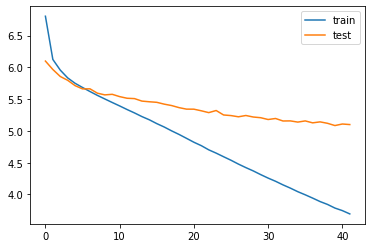

In [76]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Model inference

In [77]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = Xtr_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [78]:
# Encoding the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape = (latent_dim,))
decoder_state_input_c = Input(shape = (latent_dim,))
decoder_hidden_state_input = Input(shape = (max_len_text,latent_dim))

# Geting the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 


In [79]:
# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [80]:
def decode_sequence(input_seq):
    # Encoding the input as state vectors
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generating an empty target sequence of length 1
    target_seq = np.zeros((1,1))
    
    # Populating the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['srttok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='endtkt'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'endtkt'  or len(decoded_sentence.split()) >= (max_len_descr-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence


### Converting sequence to a word and sequence to summary

In [81]:
def seq2summary(input_seq):
    ntxt=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['srttok']) and i!=target_word_index['endtkt']):
            ntxt=ntxt+reverse_target_word_index[i]+' '
    return ntxt

def seq2text(input_seq):
    ntxt=''
    for i in input_seq:
        if(i!=0):
            ntxt=ntxt+reverse_source_word_index[i]+' '
    return ntxt


# <span style="color:#E8846F">10. Is the description matching with the text? <a name="id13"></a>


### Running the model on the data

In [122]:
for i in range(0,20):
    print("Review:",seq2text(X_train[i]))
    print("Original summary:", seq2summary(y_train[i]))
    print("Predicted summary:", decode_sequence(X_train[i].reshape(1, max_len_text)))
    print("\n")


Review: agencies provide frontline services vulnerable populations able apply provincial grants beginning week alberta minister community social services online applications open week groups apply million administered family community support services rajan sawhney interview million half million rolled million support homeless populations million allocated women shelters fast want funds hands organizations use serve vulnerable sawhney province process finalizing guidelines funding administered fcss guidelines application posted next day two cases covid reported alberta pushing total applications come cross ministry group act quickly distribute funds along funding province announced members board advise government support civil society formation agency promised united conservative party campaign platform sawhney david mitchell president ceo calgary chamber voluntary organizations one members premier council charities civil society announced mitchell coincidence group launch coincided es

**Note:** This exercise was tried using 'title' and 'description' as y. the best results from my perspective was using the second one